# Method chaining workbook

## Introduction

This is the workbook component of the "Method chaining" section of the tutorial. For the reference component, click [here](https://www.kaggle.com/residentmario/method-chaining-reference).

This is the last workbook in the tutorial. Congratulations! In this section we will put all of the things that we learned together to do some truly interesting things with some datasets. The exercises in this section are therefore also quite difficult! Try using method chaning syntax while working through the examples that follow, and make studious use of the hints that we provide.

In [2]:
import pandas as pd
pd.set_option('max_rows', 5)
from learntools.advanced_pandas.method_chaining import *

chess_games = pd.read_csv("../input/chess/games.csv")

# Checking Answers

**Check your answers in each exercise using the  `check_qN` function** (replacing `N` with the number of the exercise). For example here's how you would check an incorrect answer to exercise 1:

In [ ]:
check_q1(pd.DataFrame())

If you get stuck, **use the `answer_qN` function to see the code with the correct answer.**

For the first set of questions, running the `check_qN` on the correct answer returns `True`.

For the second set of questions, using this function to check a correct answer will present an informative graph.

## Exercises

View your data by running the cell below

In [ ]:
chess_games.head()

**Exercise 1**: It's well-known that in the game of chess, white has a slight first-mover advantage against black. Can you measure this effect in this dataset? Use the `winner` column to create a `pandas` `Series` showing how often white wins, how often black wins, and how often the result is a tie, as a ratio of total games played. In other words, a `Series` that looks something like this:

    white    0.48
    black    0.44
    draw     0.08
    Name: winner, dtype: float64
    
Hint: use `len` to get the length of the initial `DataFrame`, e.g. the count of all games played.

In [ ]:
# Your code here
print(check_q1(chess_games.winner.dropna(axis = 'rows').value_counts().map(lambda d: d/chess_games.winner.count())))
print(chess_games.winner.dropna(axis = 'rows').value_counts().map(lambda d: d/chess_games.winner.count()))
print(chess_games.winner.value_counts() / len(chess_games))
answer_q1()


**Exercise 2**: The `opening_name` field of the `chess_games` dataset provides interesting data on what the most commonly used chess openings are.  However, it gives a bit _too_ much detail, including information on the variation used for the most common opening types. For example, rather than giving `Queen's Pawn Game`, the dataset often includes `Queen's Pawn Game: Zukertort Variation`.

This makes it a bit difficult to use for categorical purposes. Here's a function that can be used to separate out the "opening archetype":

 ```python
 lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip()
 ```

Use this function to parse the `opening_name` field and generate a `pandas` `Series` counting how many times each of the "opening archetypes" gets used. Hint: use a map.

In [ ]:
# Your code here
answer_q2()
check_q2(chess_games.opening_name.map(lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip()).value_counts())
#chess_games.opening_name.map(lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip()).value_counts()

**Exercise 3**: In this dataset various players play variably number of games. Group the games by `{white_id, victory_status}` and count how many times each white player ended the game in `mate` , `draw`, `resign`, etcetera. The name of the column counting how many times each outcome occurred should be `n` (hint: `rename` or `assign` may help).

In [30]:
# Your code here
answer_q3()
print(chess_games.assign(n=0).groupby(['white_id', 'victory_status']).n.apply(len).reset_index())
check_q3(chess_games.assign(n=0).groupby(['white_id', 'victory_status']).n.apply(len).reset_index())
check_q3(chess_games.groupby(['white_id', 'victory_status']).size().reset_index().rename(columns ={0:'n'}))
chess_games.groupby(['white_id', 'victory_status']).size().reset_index().rename(columns ={0:'n'})



#reviews.rename(columns={'region_1':'region', 'region_2':'locale'})

(chess_games
    .assign(n=0)
    .groupby(['white_id', 'victory_status'])
    .n
    .apply(len)
    .reset_index()
)
                  white_id victory_status  n
0                  --jim--           mate  1
1      -l-_jedi_knight_-l-           mate  1
...                    ...            ... ..
11487               zzzbbb         resign  1
11488              zzzimon         resign  1

[11489 rows x 3 columns]


,white_id,victory_status,n
0,--jim--,mate,1
1,-l-_jedi_knight_-l-,mate,1
...,...,...,...
11487,zzzbbb,resign,1
11488,zzzimon,resign,1


**Exercise 4**: There are a lot of players in the dataset who have only played one or a small handful of games. Create a `DataFrame` like the one in the previous exercise, but only include users who are in the top 20 users by number of games played. See if you can do this using method chaining alone! Hint: reuse the code from the previous example. Then, use `pipe`.

In [51]:
# Your code here

print(chess_games
     .groupby(['white_id', 'victory_status'])
     .size()
     .reset_index()
     .rename(columns={0:'n'})
     .pipe(lambda df: df[df.white_id.isin(chess_games.white_id.value_counts().head(20).index)])
)#i got stuck here and just gave up, unsure how this works exactly
 #Okay I woke up and now this makes more sense: We have our DataFrame that we are passing it that has a numerical index and 3 columns (white_id, victory_status, 
 #number of games). We pass it into pipe which applies a method to it (in this case a lambda).
 #Step 1: (in the middle) We take the entire dataset and take only the white_id column. We then take the count of every value we find, essentially finding how many games
 #each person is part of. 
 #Step 2: We take the top 20 values (it is automatically sorted by descending) and take the indices (names) of each of the top 20 players by games played.
print(chess_games.white_id.value_counts().head(20).index)
 #Step 3: Now we take our edited dataframe with the 3 columns, and take only the white_id column, then check to see what values of our column are in this list of indice, or
 #        essentially only the rows that are played by one of these 20 people.
 #        This makes a boolean DataFrame in the same size and shape as our current array, where True is if the value had one of the top 20 players, and False is if it did not.
print(chess_games.groupby(['white_id', 'victory_status']).size().reset_index().rename(columns={0:'n'}).white_id.isin(chess_games.white_id.value_counts().head(20).index))
 #Step 4:Finally, we take our current dataframe and only select the values that match up with True in this boolean DataFrame






         white_id victory_status   n
9      1240100948           draw   3
10     1240100948           mate   7
...           ...            ...  ..
10907    vovkakuz      outoftime   4
10908    vovkakuz         resign  23

[72 rows x 3 columns]
Index(['taranga', 'chess-brahs', 'a_p_t_e_m_u_u', 'bleda', 'ssf7',
       'hassan1365416', 'khelil', 'saviter', '1240100948', 'anakgreget',
       'ozguragarr', 'ivanbus', 'vladimir-kramnik-1', 'vovkakuz', 'king5891',
       'thegrim123321', 'mastersalomon', 'islam01', 'ozil17', 'artem555'],
      dtype='object')
0        False
1        False
         ...  
11487    False
11488    False
Name: white_id, Length: 11489, dtype: bool


Next, let's do some visual exercises.

The next exercise uses the following dataset:

In [ ]:
kepler = pd.read_csv("../input/kepler-exoplanet-search-results/cumulative.csv")
kepler

**Exercise 5**: The Kepler space observatory is in the business of finding potential exoplanets (planets orbiting stars other suns) and, after collecting the evidence, generating whether or not to confirm, decline to confirm, or deny that a given space body is, in fact, an exoplanet. In the dataset above, the "before" status of the body is `koi_pdisposition`, and the "after" status is `koi_disposition`. 

Using the dataset above, generate a `Series` counting all of the possible transitions between pre-disposition and post-disposition. In other words, generate a `Series` whose index is a `MultiIndex` based on the `{koi_pdisposition, koi_disposition}` fields, and whose values is a count of how many times each possible combination occurred.

In [65]:
# Your code here
kepler.columns
print(kepler.groupby(['koi_pdisposition', 'koi_disposition']).size())
kepler.assign(n=0).groupby(['koi_pdisposition', 'koi_disposition']).n.count().reset_index()


koi_pdisposition  koi_disposition
CANDIDATE         CANDIDATE          2248
                  CONFIRMED          2248
FALSE POSITIVE    CONFIRMED            45
                  FALSE POSITIVE     5023
dtype: int64


,koi_pdisposition,koi_disposition,n
0,CANDIDATE,CANDIDATE,2248
1,CANDIDATE,CONFIRMED,2248
2,FALSE POSITIVE,CONFIRMED,45
3,FALSE POSITIVE,FALSE POSITIVE,5023


The next few exercises use the following datasets:

In [ ]:
wine_reviews = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
ramen_reviews = pd.read_csv("../input/ramen-ratings/ramen-ratings.csv", index_col=0)
print(wine_reviews.head())
print(ramen_reviews.head())

**Exercise 6**: As we demonstrated in previous workbooks, the `points` column in the `wine_reviews` dataset is measured on a 20-point scale between 80 and 100. Create a `Series` which normalizes the ratings so that they fit on a 1-to-5 scale instead (e.g. a score of 80 translates to 1 star, while a score of 100 is five stars). Set the `Series` name to "Wine Ratings", and sort by index value (ascending).

0         87
1         87
          ..
129969    90
129970    90
Name: points, Length: 129971, dtype: int64
0         1.75
1         1.75
          ... 
129969    2.50
129970    2.50
Name: Wine Ratings, Length: 129971, dtype: float64


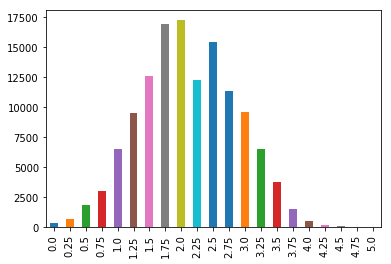

In [106]:
# Your code here
print(wine_reviews.points)
print(((wine_reviews.points.dropna()-80)/4).rename('Wine Ratings').sort_index()) 
#this should be right given what they tell you but the 'actual' answer wants value_counts??
check_q6(((wine_reviews.points.dropna()-80)/4).rename('Wine Ratings').value_counts().sort_index()) 
#answer_q6()


**Exercise 7**: The `Stars` column in the `ramen_reviews` dataset is the ramen equivalent to the similar data points in `wine_reviews`. Luckily it is already on a 0-to-5 scale, but it has some different problems...create a `Series` counting how many ramens earned each of the possible scores in the dataset. Convert the `Series` to the `float64` dtype and drop rames whose rating is `"Unrated"`. Set the name of the `Series` to "Ramen Ratings". Sort by index value (ascending).

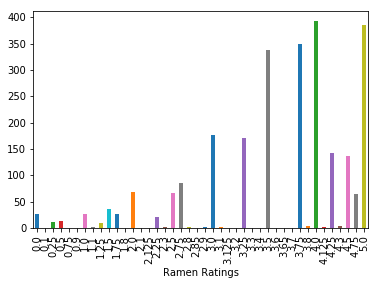

In [123]:
# Your code here
check_q7(ramen_reviews
     .Stars.replace('Unrated', None)
     .dropna().astype('float64')
     .value_counts()
     .rename_axis('Ramen Ratings')
     .sort_index()
)

**Exercise 8:**: We can see from the result of the previous exercise that whilst the wine reviewers stick to a strict 20-point scale, ramen reviews occassionally deviate into fractional numbers. Modify your answer to the previous exercise by rounding review scores to the nearest half-point (so 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, or 5).

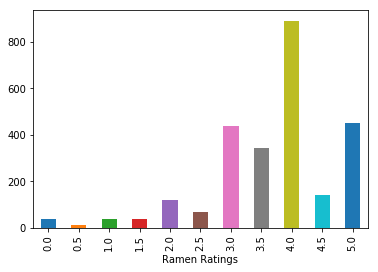

In [141]:
# Your code here
check_q8(ramen_reviews
     .Stars.replace('Unrated', None)
     .dropna().astype('float64')
     .map(lambda p: round(p*2, 0)/2)
     .value_counts()
     .rename_axis('Ramen Ratings')
     .sort_index()
     
)

# Congratulations

You've finished the Pandas track.  Many data scientist feel efficiency with Pandas is the most useful and practical skill they have, because it allows you to progress quickly in any project you have.

You can take advantage of your Pandas skills by entering a [Kaggle Competition](https://www.kaggle.com/competitions) or answering a question you find interesting using [Kaggle Datasets](https://www.kaggle.com/datasets).